In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import load

%matplotlib inline
plt.rcParams.update({'figure.figsize':(5,4), 'figure.dpi':100})

In [5]:
# load array
array_accuracy = []
array_f1 = []

resultados_svm = load('resultados_svm.npy')
resultados_mlp = load('resultados_mlp.npy')
resultados_rl = load('resultados_rl.npy')
resultados_gb = load('resultados_gbdt.npy')
resultados_knn = load('resultados_knn.npy')

array_accuracy.append(resultados_svm.item().get('accuracy'))
array_accuracy.append(resultados_mlp.item().get('accuracy'))
array_accuracy.append(resultados_rl.item().get('accuracy'))
array_accuracy.append(resultados_gb.item().get('accuracy'))
array_accuracy.append(resultados_knn.item().get('accuracy'))
array_accuracy = np.asarray(array_accuracy).T
#array_accuracy

array_f1.append(resultados_svm.item().get('f1'))
array_f1.append(resultados_mlp.item().get('f1'))
array_f1.append(resultados_rl.item().get('f1'))
array_f1.append(resultados_gb.item().get('f1'))
array_f1.append(resultados_knn.item().get('f1'))
array_f1 = np.asarray(array_f1).T
#array_f1

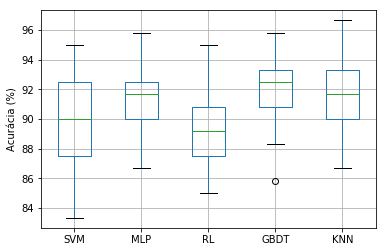

In [6]:
df_accuracy = pd.DataFrame(array_accuracy*100,columns=['SVM','MLP', 'RL', 'GBDT', 'KNN'])
boxplot_accuracy = df_accuracy.boxplot(column=['SVM','MLP', 'RL', 'GBDT', 'KNN'])
plt.ylabel('Acurácia (%)')
plt.savefig('acuracia.pdf')

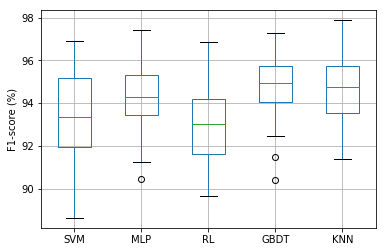

In [7]:
df_f1 = pd.DataFrame(array_f1*100,columns=['SVM','MLP', 'RL', 'GBDT', 'KNN'])
boxplot_f1 = df_f1.boxplot(column=['SVM','MLP', 'RL', 'GBDT', 'KNN'], grid = True)
plt.ylabel('F1-score (%)')
plt.savefig('f1_score.pdf')

# Usando matplotlib.pyplot

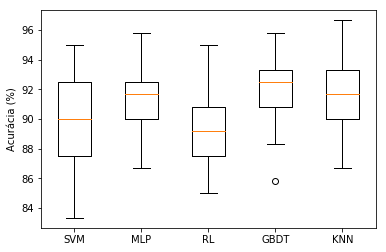

In [8]:
plt.boxplot(df_accuracy.T, labels=['SVM','MLP', 'RL', 'GBDT', 'KNN'], boxprops=dict(color='black'))
#plt.title('Desempenho dos Modelos');
#plt.xlabel('Algoritmo')
plt.ylabel('Acurácia (%)')
plt.savefig('acuracia.pdf')

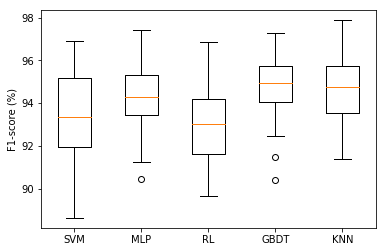

In [9]:
plt.boxplot(df_f1.T, labels=['SVM','MLP', 'RL', 'GBDT', 'KNN'], boxprops=dict(color='black'))
#plt.title('Desempenho dos Modelos');
#plt.xlabel('Algoritmo')
plt.ylabel('F1-score (%)')
plt.savefig('f1_score.pdf')

In [66]:
metricas = {
    'Acurácia': [
        "%.2f $\pm$ %.2f" % (np.mean(resultados_svm.item().get('accuracy'), axis=0), np.std(resultados_svm.item().get('accuracy'), axis=0)),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_mlp.item().get('accuracy'), axis=0), np.std(resultados_mlp.item().get('accuracy'), axis=0)),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_rl.item().get('accuracy'), axis=0), np.std(resultados_rl.item().get('accuracy'), axis=0)),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_gb.item().get('accuracy'), axis=0), np.std(resultados_gb.item().get('accuracy'), axis=0)),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_knn.item().get('accuracy'), axis=0), np.std(resultados_knn.item().get('accuracy'), axis=0))
    ],
    'Precisão': [
        "%.2f $\pm$ %.2f" % (np.mean(resultados_svm.item().get('precision'), axis=0), np.std(resultados_svm.item().get('precision'), axis=0)),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_mlp.item().get('precision'), axis=0), np.std(resultados_mlp.item().get('precision'), axis=0)),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_rl.item().get('precision'), axis=0), np.std(resultados_rl.item().get('precision'), axis=0)),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_gb.item().get('precision'), axis=0), np.std(resultados_gb.item().get('precision'), axis=0)),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_knn.item().get('precision'), axis=0), np.std(resultados_knn.item().get('precision'), axis=0))
    ],
    'Sensitividade': [
        "%.2f $\pm$ %.2f" % (np.mean(resultados_svm.item().get('recall'), axis=0), np.std(resultados_svm.item().get('recall'), axis=0)),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_mlp.item().get('recall'), axis=0), np.std(resultados_mlp.item().get('recall'), axis=0)),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_rl.item().get('recall'), axis=0), np.std(resultados_rl.item().get('recall'), axis=0)),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_gb.item().get('recall'), axis=0), np.std(resultados_gb.item().get('recall'), axis=0)),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_knn.item().get('recall'), axis=0), np.std(resultados_knn.item().get('recall'), axis=0))
    ],
    'F1-score': [
        "%.2f $\pm$ %.2f" % (np.mean(resultados_svm.item().get('f1'), axis=0), np.std(resultados_svm.item().get('f1'), axis=0)),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_mlp.item().get('f1'), axis=0), np.std(resultados_mlp.item().get('f1'), axis=0)),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_rl.item().get('f1'), axis=0), np.std(resultados_rl.item().get('f1'), axis=0)),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_gb.item().get('f1'), axis=0), np.std(resultados_gb.item().get('f1'), axis=0)),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_knn.item().get('f1'), axis=0), np.std(resultados_knn.item().get('f1'), axis=0))
    ]
}
indices=['SVM', 'MLP', 'RL', 'GBDT', 'KNN']
d = {'Acurácia': [1, 2], 'Sensitividade': [3, 4],'Precisão': [3, 4], 'F1-Score': [3, 4]}
df = pd.DataFrame(data=metricas, index = indices)
df

,Acurácia,F1-score,Precisão,Sensitividade
SVM,0.90 $\pm$ 0.03,0.93 $\pm$ 0.02,0.91 $\pm$ 0.03,0.96 $\pm$ 0.02
MLP,0.91 $\pm$ 0.02,0.94 $\pm$ 0.02,0.94 $\pm$ 0.02,0.95 $\pm$ 0.03
RL,0.89 $\pm$ 0.02,0.93 $\pm$ 0.02,0.91 $\pm$ 0.03,0.95 $\pm$ 0.02
GBDT,0.92 $\pm$ 0.02,0.95 $\pm$ 0.01,0.93 $\pm$ 0.03,0.97 $\pm$ 0.02
KNN,0.92 $\pm$ 0.02,0.95 $\pm$ 0.02,0.92 $\pm$ 0.03,0.97 $\pm$ 0.02
